## Infosis Stock Prediction

### Introduction :
Stock market analysis/prediction is considering to be the most sophisticated area specifically managed by "Fund Manager" who are providing bespoke services to institutional investors via institutions such as Hedge funds, Funds of Funds and others and other investment vehicles. Traditionally these Hedge fund managers used to perform analysis or create a strategy mainly by analyzing past financial reports, market performance and come to a conclusion what position to take for that specific security or asset class. However over the years with a tremendous increase in the amount of financial data the traditional approach for analysis and shortlisting different strategies for picking stocks is changed and a new field is emerged called Quantitative Finance. First thing first what is Quantitative Finance?

Quantitative finance is a field of applied mathematics, concerned with mathematical modelling of financial markets. To simply put we use past financial data to come up with a strategy which will let us predict a future trend or the price of an asset class.

My main aim of is to provide very beginners with a basic overview as to how we can use basic machine learning models on stock market data to predict future trends. To make things simple here we will only consider single attribute i.e stock price to analyze the trend of stock (Please note to get a model into production in the practical world it involves more than single attributes into consideration)

### Problem Statment :- 

To predict the future trend of Infosis stock by analysing previous stock price data using different machine learning models.

#### Importing the required dependencies

In [1]:
#import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from pyramid.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/iamriyasen1235/.local/lib/python3.5/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
#reading the csv file
Infy = pd.read_csv('NSE-INFY.csv')

#print the head
print(Infy.head())

#print shape
print(Infy.shape)

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-12-07  672.00  685.75  665.60  681.00  682.80             5553948.0   
1  2018-12-06  676.10  685.45  664.55  669.70  668.50             8039771.0   
2  2018-12-05  683.00  683.65  672.50  682.05  681.40             5177288.0   
3  2018-12-04  672.55  688.25  671.30  683.00  685.25             7827923.0   
4  2018-12-03  673.15  679.00  665.95  672.45  670.35             8260890.0   

   Turnover (Lacs)  
0         37715.09  
1         54036.60  
2         35152.07  
3         53451.33  
4         55395.97  
(1844, 8)


### Lets explore our dataset.
* Our data consist of 1844 rows and 8 coloumns also know as features.

* In total there 8 coloumns incuding Date,Open,High,Low,Last,Close,Total Trade Quantitty,Turnover(Lacs)

* Lests try to go through each specific coloumn. <br>

**Date** - Our data set date ranges from 29th June'11 to 7th Dec'18 <br>
**Open** - It represents the price at which the stock started trading on a particular date.<br>
**Close** - It represents the price at which the stock closed on a particular date.<br>
**High** - It represents the maximum price stock encounter on a particular date.<br>
**Low** - It represents the minimum price stock encounter on a particular date.<br>
**Total Trade Quantity** - The total no. of shares/stocks bought or sold on a particular date  <br>
**Turnover (Lacs)** - The total sales generated by a Infosys in single day.

In [3]:
# Sort the stock data by date this is important because it helps us analyz the stock price chronologically from starting date to end date 
Infy_Sorted = Infy.sort_values('Date')
print(Infy_Sorted.head())
print(Infy_Sorted.tail())

            Date     Open     High     Low    Last    Close  \
1843  2011-06-29  2868.00  2907.00  2868.0  2880.0  2881.75   
1842  2011-06-30  2886.05  2919.00  2881.5  2903.1  2910.45   
1841  2011-07-01  2935.00  2969.95  2924.1  2928.0  2934.15   
1840  2011-07-04  2966.65  2977.00  2935.0  2941.0  2938.95   
1839  2011-07-05  2957.00  2969.90  2926.0  2959.0  2956.45   

      Total Trade Quantity  Turnover (Lacs)  
1843              600094.0         17320.05  
1842             1417730.0         41163.32  
1841              800308.0         23549.85  
1840              514324.0         15162.29  
1839              802966.0         23701.22  
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
4  2018-12-03  673.15  679.00  665.95  672.45  670.35             8260890.0   
3  2018-12-04  672.55  688.25  671.30  683.00  685.25             7827923.0   
2  2018-12-05  683.00  683.65  672.50  682.05  681.40             5177288.0   
1  2018-12-06  676.10  685.45

In [4]:
#setting index as date
Infy_Sorted['Date'] = pd.to_datetime(Infy_Sorted.Date,format='%Y-%m-%d')
Infy_Sorted.index = Infy_Sorted['Date']
Infy_Sorted.head(1)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2011-06-29,2011-06-29,2868.0,2907.0,2868.0,2880.0,2881.75,600094.0,17320.05


**The Closing price of the stock is taken into consideration to calculate the overall profit/loss in particluar with respect to what price we bought/sold that stock in single trading day. Lets try to plot a graph of closing price over the yaers from 2011 to 2018**

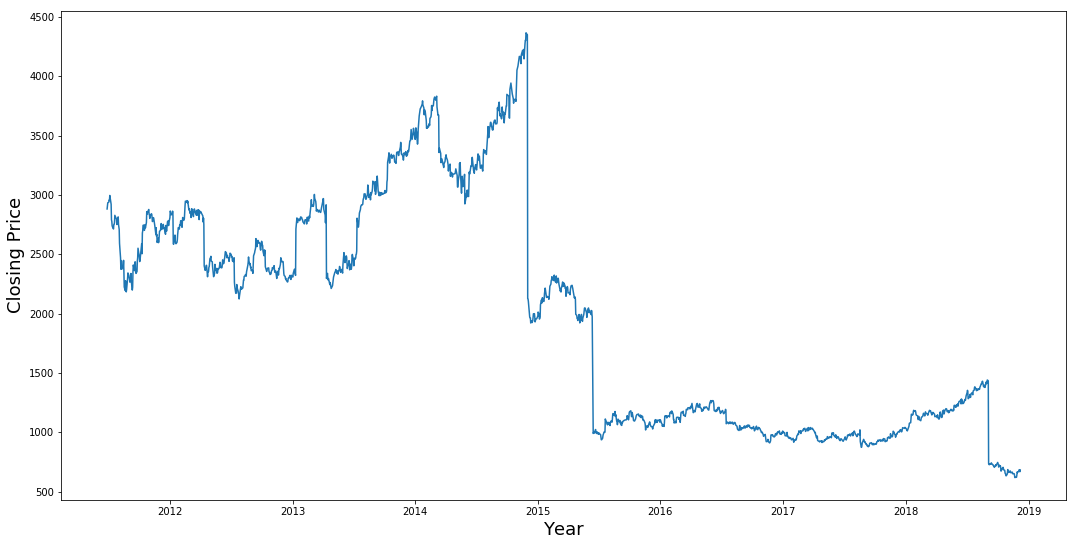

In [5]:
# Ploting the stock close price from 2011 to 2018 using matplotlib  

plt.figure(figsize = (18,9))
plt.plot(Infy_Sorted['Close'], label='Close Price history')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

## Feature Engineering

In [6]:
# lets try to define new features from exsisting this is also knows as feature Engineering 

# defining new feature, instead of Considering High and low value seprately we will consider their percentage values. 

Infy_Sorted['HL_PCT'] = (Infy_Sorted['High'] - Infy_Sorted['Low'])/(Infy_Sorted['Low']*100)

Infy_Sorted['PCT_CHNG'] = (Infy_Sorted['Close'] - Infy_Sorted['Open'])/(Infy_Sorted['Open']*100)

Infy_new = Infy_Sorted[['Close', 'HL_PCT', 'PCT_CHNG', 'Total Trade Quantity']]

print(Infy_new.head(1))

              Close    HL_PCT  PCT_CHNG  Total Trade Quantity
Date                                                         
2011-06-29  2881.75  0.000136  0.000048              600094.0


**Lets consider to forecast 50 days stock price into the future, for that we need to set a new variable as forecast_50. Then, we will create a new column in our dataframe which serves as label (aka our output).** <br>
**To fill our output data with data to be trained upon, we will set our  label column equal to our Close column, but shifted 50 units up** 

In [7]:
 # predicting 50 days into future
forecast_50 = int(50.0)

# Creating label by shifting 'Adj. Close' according to 'forecast_out'
Infy_new['label'] = Infy_new['Close'].shift(-forecast_50)
print(Infy_new.head(2))
print('\n')

# If we look at the tail, it consists of n(=forecast_50) rows with NAN in Label column 
print(Infy_new.tail(2))
print('\n')

print('length of our dataset =',len(Infy_new), "and forecast_50 =", forecast_50)

              Close    HL_PCT  PCT_CHNG  Total Trade Quantity    label
Date                                                                  
2011-06-29  2881.75  0.000136  0.000048              600094.0  2198.45
2011-06-30  2910.45  0.000130  0.000085             1417730.0  2222.05


            Close    HL_PCT  PCT_CHNG  Total Trade Quantity  label
Date                                                              
2018-12-06  668.5  0.000314 -0.000112             8039771.0    NaN
2018-12-07  682.8  0.000303  0.000161             5553948.0    NaN


length of our dataset = 1844 and forecast_50 = 50


In [8]:
# Define features Matrix X by excluding the label column which we just created 
X = np.array(Infy_new.drop(['label'], 1))

# Using a feature in sklearn, preposessing to scale features
X = preprocessing.scale(X)
print(X[1,:])

[ 0.97405882 -0.63291761  0.61150729 -0.39494115]


As our X contains last 'n= forecast_50  ' rows for which we don't have label data. We will put that in different variable.
So intially our X was having rows of 1844 and now it will with rows 1794 (-forecast_50).

In [9]:
X_forecast_out = X[-forecast_50:]
X = X[:-forecast_50]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 50 & Length of X : 1794


Now lets set our Dependent variable Y wiht values of label (output coloumn). Please not both X and Y should be of same lenght here.

In [10]:
Y = np.array(Infy_new['label'])
Y = Y[:-forecast_50]
print('Length of y: ',len(Y))

Length of y:  1794


Train and Test spliting using cross_validation.

While splitting the data into train and test, we cannot use random splitting since that will destroy the time component

In [11]:
# here we have set test_size as 0.2 which indicate 20% data is test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print('shape of X_train, X_test, y_train, y_testt: ', X_train.shape, X_test.shape ,y_train.shape,y_test.shape)

shape of X_train, X_test, y_train, y_testt:  (1435, 4) (359, 4) (1435,) (359,)


Our X (Dependant variable) will be an array consisting of our Close price values, so we need to drop the Label(output)column. We also need to scale our input (X) values using StandardScaler, it will basically transform the data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset. As always will fit_transform standardization on train data and transform the learning to test data

In [12]:
# normalizing/standardizing features using StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## ML Model  - Linear Regression

Lets apply simple basic Linear Regression on our stock data. Linear regression is a method used to model a  relationship between a dependent variable (y), and an independent variable (x). With simple linear regression, there will only be one independent variable x. With simple linear regression, there is one independent variable x.In our case we only have one independent variable which is the date and one dependent variable which is closing price

In [230]:
# Applying LR on trainging data

clf = LinearRegression()
clf.fit(X_train,y_train)

# Checking accuracy of model on test data

accuracy = clf.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.8102708939416399


In [24]:
#make predictions and find the rmse
preds = clf.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

431.7469839858023

In [117]:
# Predict using our Model
Next_50days_stock_price = clf.predict(X_forecast_out)
print(Next_50days_stock_price)

[772.4202455  836.27743045 691.84617824 804.95831536 814.89325432
 846.64498054 865.65689106 791.0668764  819.89489457 816.86055317
 812.88188158 770.34404918 763.3324254  808.77369297 765.49406789
 626.19564885 712.85489885 804.78672085 791.33038646 776.19514655
 735.86146731 782.47744382 737.44817738 740.43107387 723.29979418
 852.66396118 766.90709397 760.80772127 758.73018129 819.39567382
 768.44651906 754.36254123 783.60870196 794.20866184 781.97540993
 747.18203695 762.84516906 777.81785395 692.41414817 717.02659752
 656.95884086 646.60448321 619.83071838 681.87754187 690.12050985
 741.62814397 751.63187717 786.18169166 774.28182633 794.1453933 ]


**There you go! we have just ploted the next 50 Infosis stock price. Lets plot these stock prices by adding dates next 50 future dates to our exsisting dataset.**

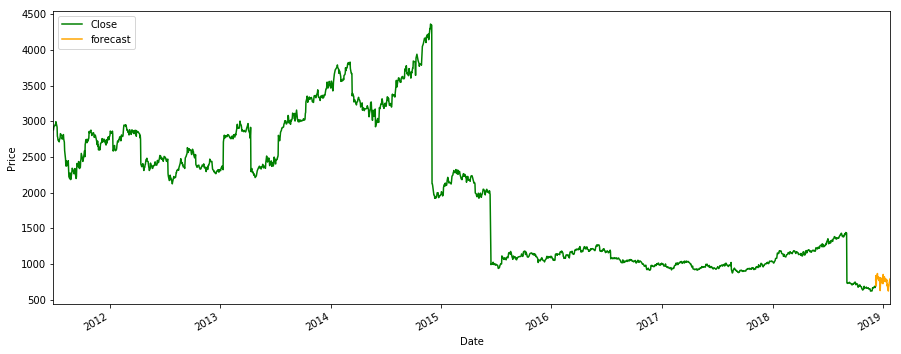

In [178]:
# Creating new coloumn in our dataset and set it to nan values
Infy_new.dropna(inplace=True)
Infy_new['forecast'] = np.nan
last_date = Infy_new.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 1000
next_unix = last_unix + one_day

for i in Next_50days_stock_price:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 1000
    Infy_new.loc[next_date] = [np.nan for _ in range(len(Infy_new.columns)-1)]+[i]

#Ploting the stock price 
Infy_new['Close'].plot(figsize=(15,6), color="green")
Infy_new['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## ML Model  - ARIMA

Lets perform perdiction through another ML model called ARIMA. ARIMA stands for Autoregressive Integrated Moving Average. It is is a very popular statistical method for time series forecasting. Time series information are data points measured at consistent time intervals. This simply implies that particular values are recorded at a constant interval which may be hourly, daily, weekly, anually etc. In Time series data each data point in the series is dependent on the previous data points. Stock prices over a time Interval (in our case from prices between specific dates) are examples of Time series data.

ARIMA has mainly three components – AR (autoregressive term), I (differencing term) and MA (moving average term). 

Let us understand each of these components –

AR term refers to the past values used for forecasting the next value. The AR term is defined by the parameter ‘p’ in arima. 

Differencing (I-for Integrated) – This involves differencing the time series data to remove the trend and convert a non-stationary time series to a stationary one. This is indicated by the “d” value in the ARIMA model. If d = 1, it looks at the difference between two-time series entries, if d = 2 it looks at the differences of the differences obtained at d =1, and so forth.

MA term is used to defines number of past forecast errors used to predict the future values. The AR term is defined by the parameter ‘q’ in arima

Although there is tradational ARIMA model , In our case we will be using auto_arima in which Parameter tuning aka selection of best combination of inputs (p,q,d) is shortlisted automatically that provides the least error

In [13]:
from pyramid.arima import auto_arima

Infy_Sorted = Infy.sort_index(ascending=True, axis=0)

train_data = Infy_Sorted[:1290]
test_data = Infy_Sorted[1290:]

training_data = train_data['Close']
testing_data = test_data['Close']

ar = auto_arima(training_data, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
ar.fit(training_data)

Future_price = ar.predict(n_periods=554)
Future_price = pd.DataFrame(Future_price,index = test_data.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14767.997, BIC=14793.758, Fit time=6.892 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15637.143, BIC=15647.448, Fit time=0.157 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15236.193, BIC=15256.802, Fit time=3.451 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14766.004, BIC=14786.613, Fit time=4.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14767.066, BIC=14792.827, Fit time=5.477 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15637.689, BIC=15653.146, Fit time=0.329 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=14767.100, BIC=14792.861, Fit time=12.697 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14761.010, BIC=14791.924, Fit time=28.633 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14764.508, BIC=14800.574, Fit time=42.835 seconds
Fit ARI

No handles with labels found to put in legend.


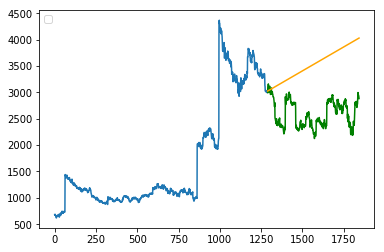

In [17]:
#plot the predicted 

plt.legend(loc=2)
plt.plot(train_data['Close'])
plt.plot(test_data['Close'],color="green")
plt.plot(Future_price['Prediction'],color="orange")
plt.show()

Lets find RMSE for our model. The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values.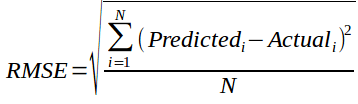

In [22]:
# Calculating RMSE 

RMSE=np.sqrt(np.mean(np.power((np.array(testing_data)-np.array(Future_price['Prediction'])),2)))
RMSE

1010.0021389097408

## ML Model  - Prophet

Lets perform perdiction through another ML model called Prophet. Facebook released a paper describing a way to make forecasts at the scale Facebook does (huge). The idea is that analysts need a way to make forecasts quickly and reliably while still maintaining the ability to add value with their experience. The outcome of this is Prophet. In the words of Facebook themselves. Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.

In [28]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
Infy_prophet = pd.DataFrame(index=range(0,len(Infy_Sorted)),columns=['Date', 'Close'])

for i in range(0,len(Infy_prophet)):
    Infy_prophet['Date'][i] = Infy_Sorted['Date'][i]
    Infy_prophet['Close'][i] = Infy_Sorted['Close'][i]

Infy_prophet['Date'] = pd.to_datetime(Infy_prophet.Date,format='%Y-%m-%d')
Infy_prophet.index = Infy_prophet['Date']

#preparing data
Infy_prophet.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = Infy_prophet[:1290]
valid = Infy_prophet[1290:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
#rmse
forecast_valid = forecast['yhat'][1290:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

352.0543292850981

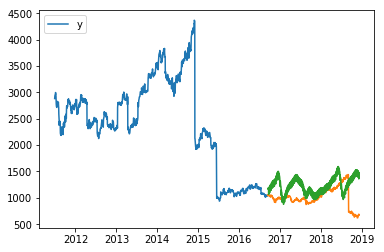

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])
plt.legend(loc=2)

## Own Strategy

In [13]:
# here we are considering only 'Open', 'High', 'Low' ,'Close' features from our dataset

Infy_Sorted = Infy_Sorted.dropna()
Infy_OHLC = Infy_Sorted[['Open', 'High', 'Low', 'Close']]

lets prepare the dataset by adding new features such as:-

High minus Low price
Close minus Open price
Three day moving average
Ten day moving average
30 day moving average
Standard deviation for a period of 10 days

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses
Standard deviation is a statistical measurement which measures historical volatility of particular stock. In our case we are considering volatility for 10 days.

In [17]:
Infy_OHLC['H-L'] = Infy_OHLC['High'] - Infy_OHLC['Low']
Infy_OHLC['O-C'] = Infy_OHLC['Close'] - Infy_OHLC['Open']
Infy_OHLC['3day MA'] = Infy_OHLC['Close'].shift(1).rolling(window = 3).mean()
Infy_OHLC['10day MA'] = Infy_OHLC['Close'].shift(1).rolling(window = 10).mean()
Infy_OHLC['30day MA'] = Infy_OHLC['Close'].shift(1).rolling(window = 30).mean()
Infy_OHLC['Std_dev']= Infy_OHLC['Close'].rolling(10).std()

Here we are setting output value - rise in price as '1' whenever the closing price of tomorrow is greater than the closing price of today.

In [18]:
Infy_OHLC['Rise_in_Price'] = np.where(Infy_OHLC['Close'].shift(-1) > Infy_OHLC['Close'], 1, 0)

In [19]:
# Droping nan value
Infy_OHLC = Infy_OHLC.dropna()
Infy_OHLC.head(1)

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Rise_in_Price
Date,,,,,,,,,,,
2011-08-10,2448.0,2476.4,2411.1,2447.1,65.3,-0.9,2478.75,2676.77,2789.978333,158.426736,0


Creating input(X) and output(Y) data frames. 
Here input feature X consist from 4th index coloumn (H-L) till 9th Index(Std_dev)
Output feature Y consist of 10th index(Rise_in_Price)coloumn.

In [20]:
X = Infy_OHLC.iloc[:, 4:-1]
Y = Infy_OHLC.iloc[:, -1]

Train Test split 

In [21]:
split = int(len(Infy_OHLC)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], Y[:split], Y[split:]

We now normalize/standardize our price data using StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Building the Artificial Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

WE are using Sequential library to build our neural network neural network , Dense is used to build layers of our artificial neural network.



We are using add() function to add layers into our neural_network. 

Parameters of Dense function

Units: The no. of nodes or neurons in a layer. In our case it is 135 meaning there will be 135 neurons in our hidden layer.

Kernel_initializer: It is starting values for the weights of the different neurons in the hidden layer.In our case its ‘uniform’ weights will have uniform distribution value

Activation: It is activation function for the neurons in a hidden layer.

Input_dim: This defines the number of inputs to the hidden layer.

In [24]:
# Defiing the neural network model

neural_network = Sequential()
neural_network.add(Dense(units = 135, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

lets now add second layer to our neural_network, which makes our neural_network involving two layers only.

In [25]:
neural_network.add(Dense(units = 135, kernel_initializer = 'uniform', activation = 'relu'))

here we are now building the output layer, from which we require a single output. Thats why units passed=1, activation function is chosen to be the Sigmoid function which makes the prediction to be a probability of market moving upwards.

In [26]:
neural_network.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Here we are compiling the neural_network by passing the following parameters

Optimizer: we passed optimizer as 'adam', which is an extension of the stochastic gradient descent.

Loss:It defines the loss to be optimized during the training period. 

Metrics: This defines the list of metrics to be evaluated by the model during the testing and training phase.

In [27]:
neural_network.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

Fiting the model on traning data by  by passing the following parameters

Batch size -  It refers to the number of data points that the model uses to compute the error before backpropagating the errors and making modifications to the weights

epochs - The number of times the training of the model will be performed on the train dataset

In [28]:
neural_network.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1451/1451 [==============================] - 3s 2ms/step - loss: 0.2500 - acc: 0.5258
Epoch 2/100
1451/1451 [==============================] - 0s 194us/step - loss: 0.2492 - acc: 0.5265
Epoch 3/100
1451/1451 [==============================] - 0s 225us/step - loss: 0.2482 - acc: 0.5348
Epoch 4/100
1451/1451 [==============================] - 0s 212us/step - loss: 0.2486 - acc: 0.5265
Epoch 5/100
1451/1451 [==============================] - 0s 210us/step - loss: 0.2482 - acc: 0.5486
Epoch 6/100
1451/1451 [==============================] - 0s 224us/step - loss: 0.2477 - acc: 0.5445
Epoch 7/100
1451/1451 [==============================] - 1s 384us/step - loss: 0.2471 - acc: 0.5479
Epoch 8/100
1451/1451 [==============================] - 0s 229us/step - loss: 0.2473 - acc: 0.5493
Epoch 9/100
1451/1451 [==============================] - 0s 283us/step - loss: 0.2466 - acc: 0.5445
Epoch 10/100
1451/1451 [==============================] - 0s 280us/step - loss: 0.2465 - acc: 0.5534
E

As the traing of model is completed we finally are ready to make predictions 

Predicting on test data and storing the predcitions back into y_pred which are greater than 0.5, i.e y-pred will consist of bollean values.

In [29]:
y_pred = neural_network.predict(X_test)
y_pred = (y_pred > 0.5)

Creating new coloumn of y_pred in our dataset and then adding our predicted values into this column , starting from the rows of the test dataset. Droping nan values at last.

In [30]:
Infy_OHLC['y_pred'] = np.NaN
Infy_OHLC.iloc[(len(Infy_OHLC) - len(y_pred)):,-1:] = y_pred
trade_Infy = Infy_OHLC.dropna()

Now that we have predicted values , we are calculating stratagies as per below. 

We consider long position when the predicted value of y is true and short position when it is False.

Creating new coloumn‘Tomorrows Returns’ in the trade_Infy and assign it as 0. Then we are take log of the closing price of today divided by the closing price of yesterday. Next, we shift these values upwards by one element so that tomorrow’s returns are stored against the prices of today.

In [32]:
trade_Infy['Tomorrows Returns'] = 0.
trade_Infy['Tomorrows Returns'] = np.log(trade_Infy['Close']/trade_Infy['Close'].shift(1))
trade_Infy['Tomorrows Returns'] = trade_Infy['Tomorrows Returns'].shift(-1)

Now we'll calculate Strategy Returns usising np.where() function, we then store the value in the column ‘Tomorrows Returns’ if the value in the ‘y_pred’ column stores True (a long position), else we would store negative of the value in the column ‘Tomorrows Returns’ (a short position); into the ‘Strategy Returns’ column

In [33]:
trade_Infy['Strategy Returns'] = 0.
trade_Infy['Strategy Returns'] = np.where(trade_Infy['y_pred'] == True, trade_Infy['Tomorrows Returns'], - trade_Infy['Tomorrows Returns'])

We calculate both market return and the strategy return. These values are computed using the cumsum() function. We will use the cumulative sum to plot the graph of market and strategy returns in the last step.

In [34]:
trade_Infy['Cumulative Market Returns'] = np.cumsum(trade_Infy['Tomorrows Returns'])
trade_Infy['Cumulative Strategy Returns'] = np.cumsum(trade_Infy['Strategy Returns'])

Plotting both the returns 

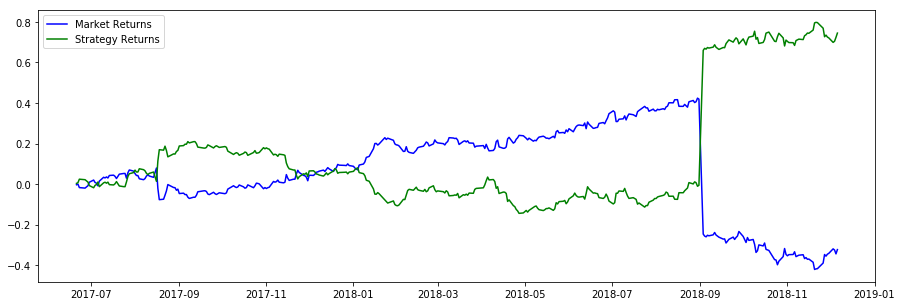

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(trade_Infy['Cumulative Market Returns'], color='b', label='Market Returns')
plt.plot(trade_Infy['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

## ML Model - LSTM

Now lets to predict closing prices using a simple LSTM Recurrent Neural Network.

LSTMs are widely used for sequence prediction problems and time series data. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has mainly following gates involved:

1.) Cell State: Short term and Long term memory are stored here.
2.) Hidden State: Hidden State can be used to retrieve short term and long term memory.
3..) Input data: It decides how much information flow into the cell state.
4.) Forget data: How much information from current input and previous cell state flows into the current cell state.
5.) Output Gate: Decided how much data flows into the hidden state from the current state

(For detail explanation on working of LSTM please refer this article.http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 

In [18]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [45]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
Data_sorted = Infy_Sorted.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(Infy_Sorted)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = Data_sorted['Date'][i]
    new_data['Close'][i] = Data_sorted['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
Final_Infy = new_data.values

train = Final_Infy[:1290]
valid = Final_Infy[1290:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dense(1))

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = LSTM_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 307s - loss: 0.0044


In [46]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

56.66400958563059

Text(0, 0.5, 'Price')

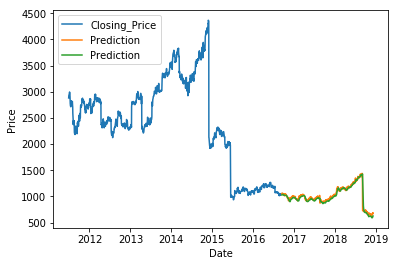

In [51]:
#for plotting
train = new_data[:1290]
valid = new_data[1290:]
valid['Predictions'] = closing_price
plt.plot(train['Close'] ,label='Closing_Price')
plt.plot(valid[['Close','Predictions']], label='Prediction')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')